## Análise do Mercado Imobiliário - São Paulo / 2019

#### Objetivos

- Aplicar três modelos de Machine Learning (Regressão Linear, Árvore de decisão e Random Forest) para encontrar qual o melhor modelo para analisar os preços dos imoveis do estado de São Paulo e prever se os preços dos alugueis, baseando-se em suas caracteristicas que estão registradas no arquivo CSV.

##### Observação importante:


- Os dados representados pelo arquivo CSV são para criação de algoritmos de Machine Learning e aplicações de técnicas de Data Science apenas para estudos. Em um case real, precisariamos de alguns dados que não estão presentes em nossa base de dados, como por exemplo: Quantos anos tem o imovel. Informações de infraestrutura do condominio, informações sobre o bairro ao longo do tempo, informações sobre orientação solar e etc...

- Por isso o modelo criado aqui não é tão preciso quanto precisaria ser e foi feito por mim para praticar e estudar!

### Importações necessárias

As bibliotecas que vamos utilizar:

Pandas: É uma biblioteca Python de código aberto que fornece estruturas de dados e ferramentas de análise para manipular esses dados.

Matplotlib: É uma biblioteca de plotagem 2D e 3D para Python. É amplamente utilizado em análise de dados, ciência de dados e aprendizado de máquina. Matplotlib oferece uma ampla variedade de gráficos e funcionalidades.

Numpy: É uma biblioteca de código aberto para computação numérica em Python. Numpy oferece um conjunto de funções de alto nível que podem ser usadas para lidar com dados multidimensionais. Numpy é amplamente utilizado em análise de dados, aprendizado de máquina e processamento de sinais.

Scikit-learn (sklearn): É uma biblioteca de machine learning para Python que oferece ferramentas simples e eficientes para análise preditiva de dados. Ela inclui uma variedade de algoritmos de aprendizado supervisionado e não supervisionado, além de utilitários para pré-processamento de dados e avaliação de modelos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Leitura da base de dados

In [2]:
df_data = pd.read_csv("sao-paulo-properties-april-2019.csv")

In [3]:
df_data.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


#### Criação do Data Frame apenas com os alugueis

In [4]:
df_rent = df_data[df_data["Negotiation Type"] == "rent"]

In [5]:
df_rent.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


#### Verificando informações gerais sobre os dados

In [6]:
df_rent.shape

(7228, 16)

In [7]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory usa

In [8]:
df_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


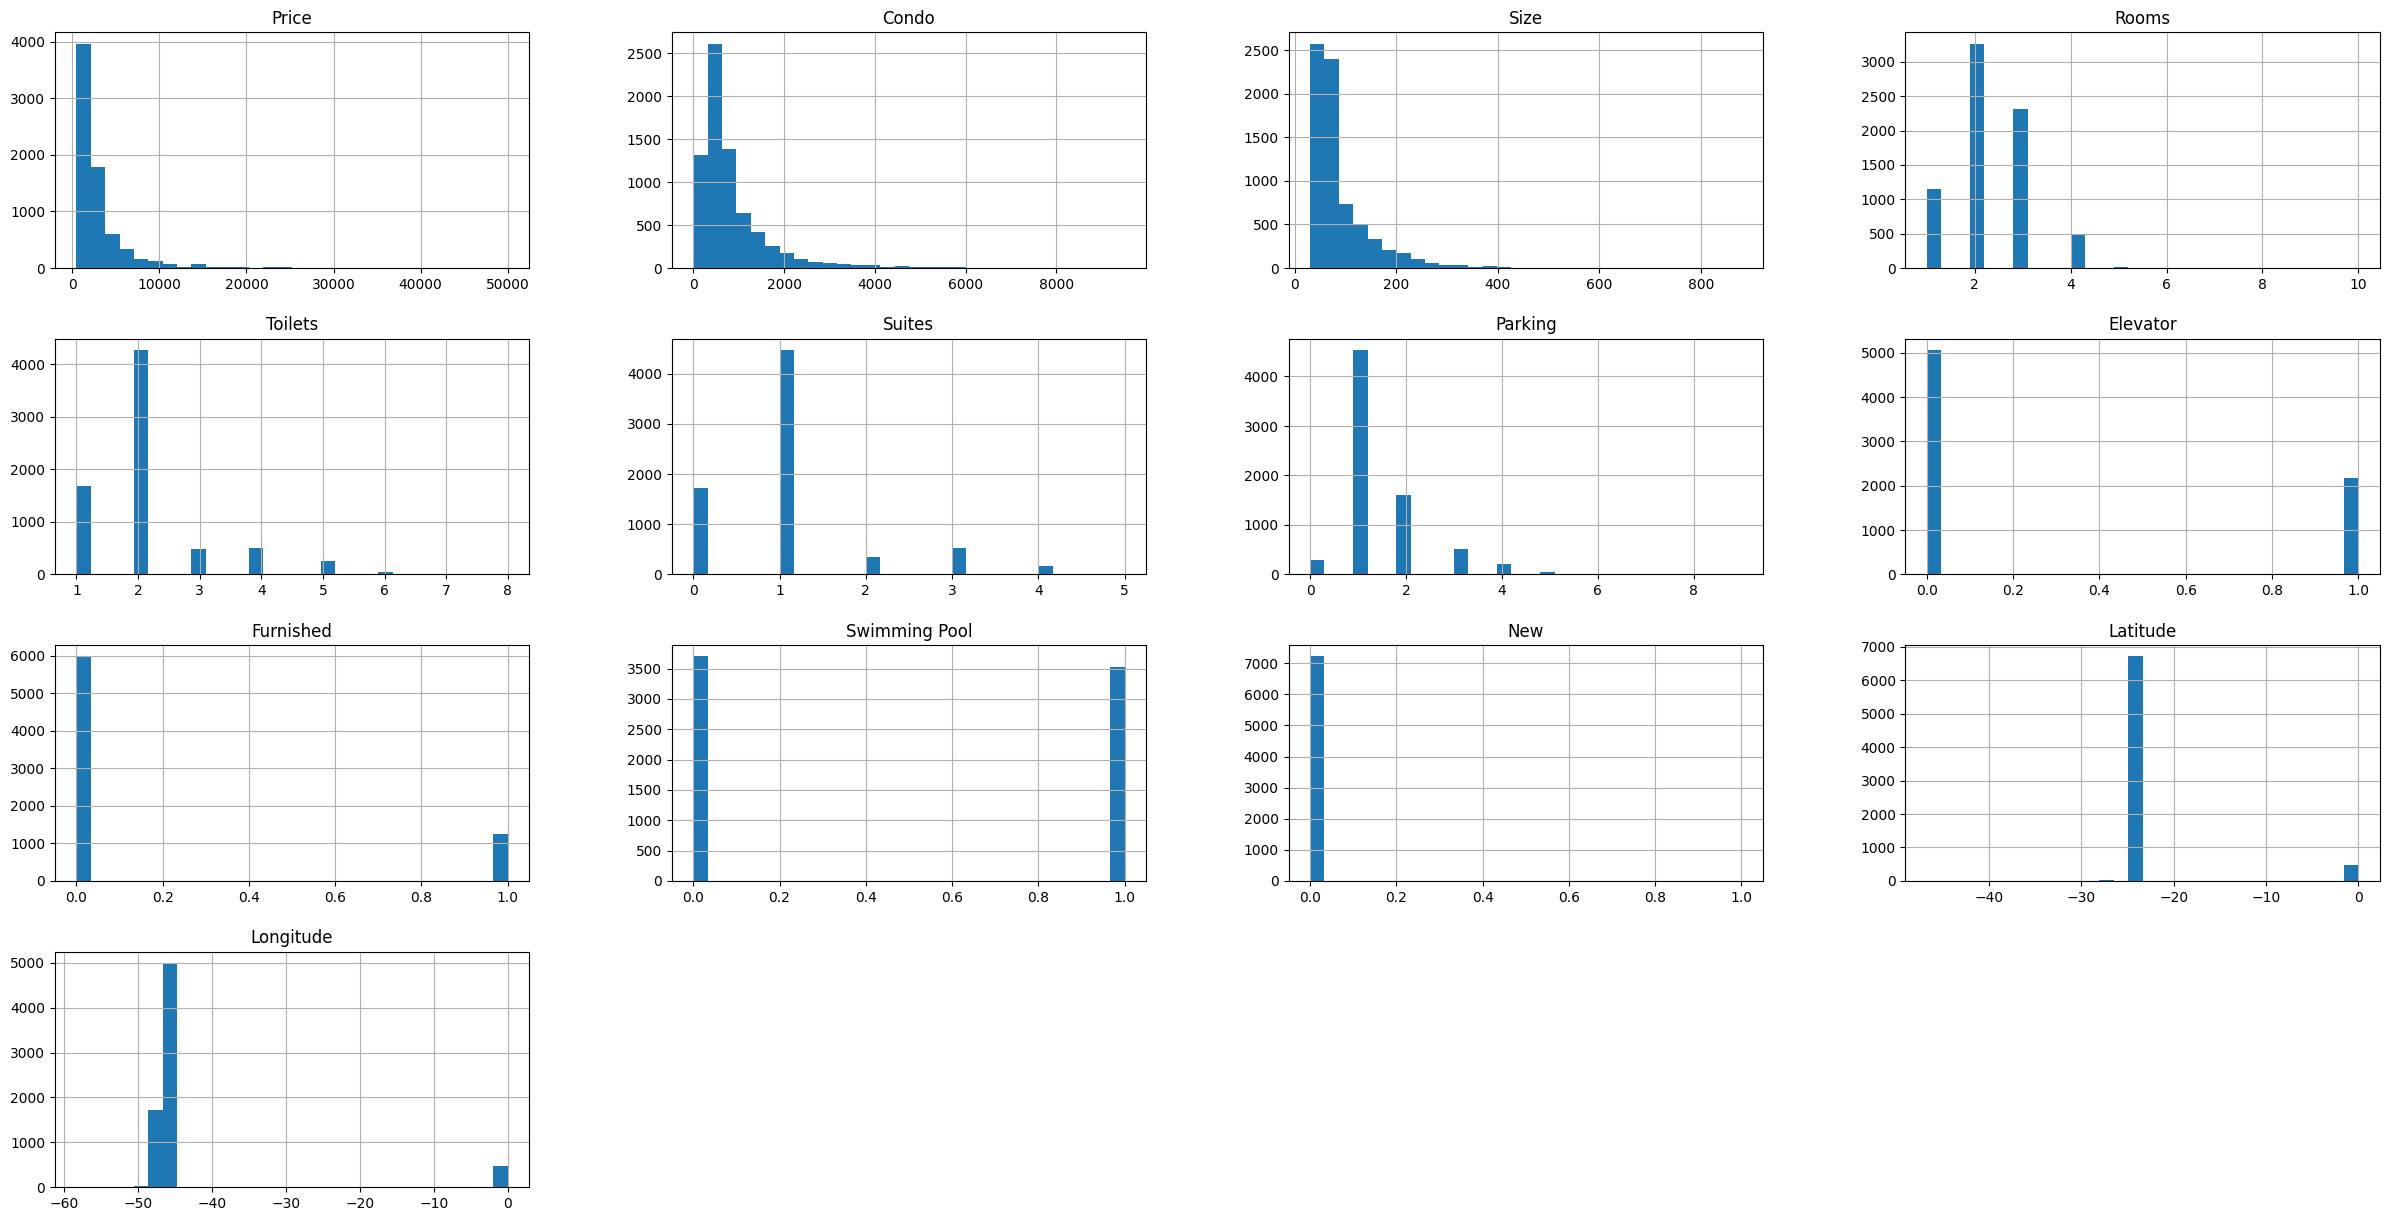

In [9]:
df_rent.hist(bins=30, figsize=(30, 15))
plt.show()

#### Uma rápida verificação na correlação

In [10]:
# Selecionando apenas as colunas numéricas do DataFrame antes de verificar a correlação, evitando erros
numeric_columns = df_rent.select_dtypes(include=[np.number]).columns

correlation_result = (
    df_rent[numeric_columns].corr()["Price"].sort_values(ascending=False)
)

print(correlation_result)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64


### Preparação dos nossos dados para modelos de ML

Nesta etapa é feita toda a preparação necessária para poder trabalhar os modelos de ML que posso vir a utilizar.

A preparação inclui limpeza e tratamento dos dados conforme a necessidade para o projeto.

### Limpeza de dados desnecessários

In [11]:
# Excluindo colunas (features) inuteis para não atrapalhar o treino
df_cleaned = df_rent.drop(["New", "Property Type", "Negotiation Type"], axis=1)

In [12]:
df_cleaned.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436


#### Tratando os dados categóricos

Utilizei a função get_dummies do pandas para criar variáveis dummy (one-hot encoding) a partir da coluna categórica "District" no DataFrame df_cleaned.

Vamos remover a coluna original "District" do DataFrame df_cleaned e a substitui pelas novas colunas dummy criadas pela função get_dummies.

O resultado obtido disso é um DataFrame expandido com as colunas dummy adicionadas no lugar da coluna original "District".

Cada coluna dummy representa a presença ou ausência de um distrito específico, utilizando 0 e 1 como valores.

Essa técnica é útil para modelos de machine learning que se beneficiam de uma representação binária de variáveis categóricas, sendo esse o caso deste projeto.


In [13]:
one_hot = pd.get_dummies(df_cleaned["District"])

df = df_cleaned.drop("District", axis=1)
df = df.join(one_hot)
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1000,148,45,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1000,100,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1000,200,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1300,410,55,2,2,1,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
11206,21000,3000,208,4,4,3,3,1,1,1,...,False,False,False,False,False,False,False,False,False,False
11207,3800,710,55,1,1,0,1,0,1,1,...,False,False,False,False,False,False,False,False,False,False
11208,5000,2354,205,3,2,1,2,1,0,0,...,False,False,False,False,False,False,False,False,False,False


#### Treinamento de modelos

Primeiro vamos seguimentar nossos dados em "treino" e "teste".

Depois esses dados serão usados para treinar 3 modelos (Regressão Linear, Arvore de Decisão e Floresta Aleatória), para questão de fixação e aprendizado.

Vamos verificar qual seria o melhor modelo para poder o nosso problema (Prever o preço dos alugueis), verificando qual vai nos apresentar a menor taxa de erro.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
Y = df["Price"]
X = df.loc[:, df.columns != "Price"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

##### Testando Regressão Linear

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Função custo para começar a fazer otimização do nosso modelo
lin_reg.fit(x_train, y_train)

LinearRegression()

In [18]:
# Vamos verificar alguns dados e labels no conjunto de treinamento.

# Seleciona os primeiros 5 registros do conjunto de treinamento (dados de entrada).
alguns_dados = x_train.iloc[:5]

# Seleciona as primeiras 5 labels correspondentes aos dados de entrada no conjunto de treinamento.
algumas_label = y_train[:5]

# Imprime as predições feitas pelo modelo de regressão linear para os primeiros 5 registros do conjunto de treinamento.
print("Predições:", lin_reg.predict(alguns_dados))

# Imprime as labels reais correspondentes aos primeiros 5 registros do conjunto de treinamento.
print("Labels: ", algumas_label.values)

Predições: [1934.47117615  654.1072998   953.75456238 9593.79084778 3169.35250854]
Labels:  [2100 1150 1000 6000 2600]


In [19]:
from sklearn.metrics import mean_squared_error

# Calculando a raiz do erro quadrático médio (RMSE) para avaliar o desempenho do modelo de regressão linear.

# Fazendo predições utilizando o modelo de regressão linear nos dados de treinamento.
preds = lin_reg.predict(x_train)

# Calcula o erro quadrático médio (MSE) comparando as predições com as labels reais do conjunto de treinamento.
lin_mse = mean_squared_error(y_train, preds)

# Calcula a raiz quadrada do MSE para obter o RMSE, uma métrica comumente usada para avaliar a precisão de modelos de regressão.
lin_rmse = np.sqrt(lin_mse)

# Imprime o valor final do RMSE, que representa a raiz quadrada do erro quadrático médio.
print(f"RMSE: {lin_rmse}")

RMSE: 1892.6831678118458


##### Testando Arvore de Decisão

In [20]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [21]:
alguns_dados = x_train.iloc[:5]

algumas_label = y_train[:5]

print("Predições:", tree_reg.predict(alguns_dados))

print("Labels: ", algumas_label.values)

Predições: [2100. 1150. 1000. 6000. 2600.]
Labels:  [2100 1150 1000 6000 2600]


In [22]:
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)

tree_rmse = np.sqrt(tree_mse)
print(f"RMSE: {tree_rmse}")

RMSE: 37.29243625992674


##### Avaliação mais precisa usando Cross Validation

Cross-validation é uma técnica estatística utilizada para avaliar o desempenho de um modelo de machine learning, dividindo o conjunto de dados em partes distintas para treino e teste, permitindo uma avaliação mais robusta e para garantir que um modelo funciona bem em diferentes situações.

Agora vamos comparar se o modelo de Árvore teria um desempenho melhor ou pior do que a regressão linear para este nosso caso!

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10
)
tree_rmse_scores = np.sqrt(-scores)


def display_scores(scores):
    print("Pontuações:", scores)
    print("Média:", scores.mean())
    print("Desvio padrão:", scores.std())


display_scores(tree_rmse_scores)

Pontuações: [2295.13605207 2363.66150944 2465.01981679 1644.90143045 1993.38577063
 2511.04233069 2830.6948078  1941.52421041 2946.71198656 2282.73857693]
Média: 2327.4816491784864
Desvio padrão: 376.84706223455146


Graças ao Cross-Validation, podemos perceber que ao testar com um conjunto de dados que o modelo ainda não havia treinado, o RMSE passa de 33 (Resultado da arvore de decisão) para 2423.

Isso indica um exemplo claro de overfit, pois no caso da Arvore de decisão, o modelo se ajustou bem até demais aos nossos dados!

In [24]:
scores = cross_val_score(
    lin_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10
)
lin_rmse_scores = np.sqrt(-scores)


def display_scores(scores):
    print("Pontuações:", scores)
    print("Média:", scores.mean())
    print("Desvio padrão:", scores.std())


display_scores(lin_rmse_scores)

Pontuações: [2.31538389e+03 2.16962264e+03 1.75260933e+03 1.92653902e+03
 1.52704940e+03 2.08720763e+03 2.27051425e+03 1.15927827e+09
 1.54463879e+03 1.35216854e+10]
Média: 1468097926.0360005
Desvio padrão: 4032701166.143073


Quando usamos o cross com a regressão linear, podemos ver que o RMSE esta bem próximo , levando em consideração o desvio padrão. Significa que eles estão errando a mesma coisa.

Então para resolver o nosso problema, a arvore de decisão é muito pior do que a regressão linea.

E com isso chegamos a conclusão de que podemos descartar a utilização da Arvore de decisão!

##### RandomForest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [26]:
# Avaliação de erro
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse)
rf_rmse

682.0954777760936

In [27]:
scores = cross_val_score(
    rf_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10
)
rf_rmse_scores = np.sqrt(-scores)


def display_scores(scores):
    print("Pontuações:", scores)
    print("Média:", scores.mean())
    print("Desvio padrão:", scores.std())


display_scores(rf_rmse_scores)

Pontuações: [2014.5580644  2028.53030555 1668.44078535 1556.02276536 1317.63344284
 2019.46294674 2269.389566   1627.61254025 1417.3822009  1639.00976671]
Média: 1755.8042384094838
Desvio padrão: 293.04624974861525


Ao aplicar o cross-validation no modelo RandomForest, verifica-se que a taxa de erro foi a menor apresentada até agora fazendo com que dos três escolhidos para este projeto, seria o modelo mais promissor!

#### Avaliar e otimizar o nosso modelo

In [28]:
from sklearn.model_selection import GridSearchCV

# Definindo as combinações de hiperparâmetros a serem testadas
param_grid = [
    {
        "n_estimators": [3, 10, 30],
        "max_features": [2, 4, 6, 8],
    },  # Primeiro conjunto de hiperparâmetros
    {
        "bootstrap": [False],
        "n_estimators": [3, 10],
        "max_features": [2, 3, 4],
    },  # Segundo conjunto de hiperparâmetros
]

# Criando um modelo RandomForestRegressor
forest_reg = RandomForestRegressor()

# Criando um objeto GridSearchCV para encontrar a melhor combinação de hiperparâmetros
grid_search = GridSearchCV(
    forest_reg,  # Modelo a ser utilizado
    param_grid,  # Grade de hiperparâmetros a serem testados
    cv=5,  # Número de dobras (folds) na validação cruzada
    scoring="neg_mean_squared_error",  # Métrica de avaliação a ser otimizada (aqui é o erro quadrático médio negativo)
    return_train_score=True,  # Retorna os resultados do treinamento para cada combinação de hiperparâmetros
)

# Treinando o modelo com todas as combinações de hiperparâmetros
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [30]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [31]:
# Acessando os resultados da validação cruzada do GridSearchCV
cvres = grid_search.cv_results_

# Iterando sobre os resultados para imprimir a raiz quadrada do erro quadrático médio negativo e os parâmetros correspondentes
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    # Calculando a raiz quadrada do negativo do erro quadrático médio (o resultado original está negativo)
    print(np.sqrt(-mean_score), params)

2170.50181057496 {'max_features': 2, 'n_estimators': 3}
1966.1051789850328 {'max_features': 2, 'n_estimators': 10}
1887.9718348989466 {'max_features': 2, 'n_estimators': 30}
2106.1383233256074 {'max_features': 4, 'n_estimators': 3}
1909.4085881409815 {'max_features': 4, 'n_estimators': 10}
1876.270741904042 {'max_features': 4, 'n_estimators': 30}
2118.3853725586014 {'max_features': 6, 'n_estimators': 3}
1947.383124719879 {'max_features': 6, 'n_estimators': 10}
1856.1426631660934 {'max_features': 6, 'n_estimators': 30}
2086.232329930595 {'max_features': 8, 'n_estimators': 3}
1875.316439544123 {'max_features': 8, 'n_estimators': 10}
1844.1612852190005 {'max_features': 8, 'n_estimators': 30}
2066.0796152345574 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1941.5190127653052 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2072.4470009526726 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1914.5103222338187 {'bootstrap': False, 'max_features': 3, 'n_estim

##### Avaliando seu modelo em dados de teste

In [32]:
# Obtendo o melhor modelo encontrado durante a busca de grade
final_model = grid_search.best_estimator_

# Fazendo previsões no conjunto de teste usando o melhor modelo
final_predictions = final_model.predict(x_test)

# Calculando o erro quadrático médio entre as previsões e os rótulos reais do conjunto de teste
final_mse = mean_squared_error(y_test, final_predictions)

# Calculando a raiz quadrada do erro quadrático médio para obter uma medida mais interpretável
final_rmse = np.sqrt(final_mse)

# Imprimindo a raiz quadrada do erro quadrático médio do melhor modelo no conjunto de teste
print(final_rmse)

1894.2156314268204


### Conclusão

Após analisar os três principais modelos de machine learning, podemos concluir neste caso, que o modelo RandomForest, foi o que teve a menor taxa de erro apresentada. Então seria o modelo mais promissor e por isso utilizei técnicas de otimização para aumentar a assertividade e a perfomance.

Portanto, se quisessemos um modelo que fosse mais próximo do real, precisariamos de muito mais dados do que os que nos foi fornecido nesta base.